In [1]:
import joblib
import theano
import lasagne
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import helpers

Using gpu device 0: GRID K520 (CNMeM is disabled, CuDNN not available)


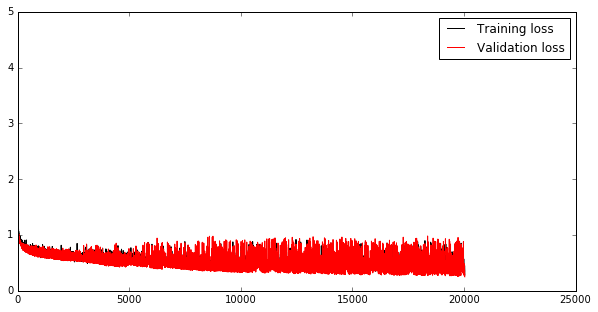

In [17]:
""" Load a trained rnn and some test data. """
from helpers import gen_batch_simple
reload(helpers)

SEQ_LEN=60
PRED_LEN=7*12
BATCH_SIZE=1000
(net, loss) = joblib.load('net_params/20gauss_net_large')
invar = lasagne.layers.get_all_layers(net)[0].input_var
predictor = theano.function([invar], 
    lasagne.layers.get_output(net, deterministic=True), 
    allow_input_downcast=True)
np.random.seed(1423)
x_tst, y_tst = gen_batch_simple(batch_size=BATCH_SIZE, seq_len=SEQ_LEN+PRED_LEN, 
    which='test', log=True)

# Plot training progress.
last_epoch = np.where(loss[0]==0)[0][0]
plt.figure(figsize=(10,5), facecolor='white')
plt.plot(loss[0,:last_epoch].T, 'k-', label='Training loss')
plt.plot(loss[1,:last_epoch].T, 'r-', label='Validation loss')
plt.ylim([0,5])
plt.legend()


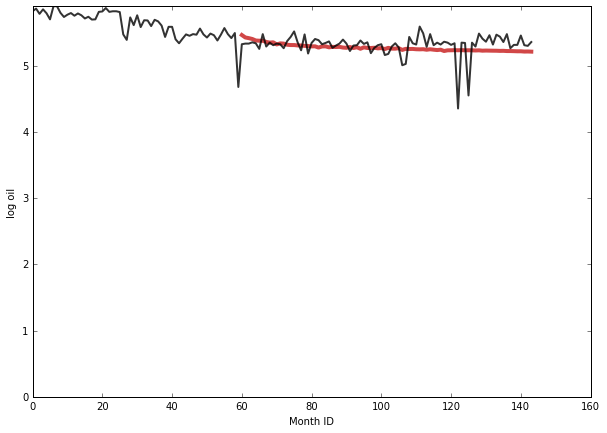

In [22]:
reload(helpers)
from helpers import predict_pnn

tst_id = 1
plt.figure(facecolor='white', figsize=(10, 7))
x, density = predict_pnn(predictor, x_tst[tst_id:tst_id+1,:,:SEQ_LEN], num_steps=PRED_LEN, n_samples=10000, bias=10,
                        density_grid=np.linspace(0,10,100), expected=False)
#plt.imshow(np.log(np.array(density).T), origin='lower',
#           extent=[SEQ_LEN, SEQ_LEN+PRED_LEN, 0, 10], cmap='BrBG_r')
plt.ylim([0, max(x.max(), x_tst[tst_id].max())])

plt.plot(range(SEQ_LEN, SEQ_LEN+PRED_LEN), x.flatten()[SEQ_LEN:], '-', color=(.8,.2,.2,.9), linewidth=4)
plt.plot(x_tst[tst_id].flatten(), '-', color=(0,0,0,.8), linewidth=2)
plt.axes().set_aspect('auto')

plt.xlabel('Month ID')
plt.ylabel('log oil')
#plt.plot(y_tst[tst_id].flatten(), 'k-')